In [1]:
import numpy as np
import pandas as pd

import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
dataSet = pd.read_csv('./Dataset/Mall_Customers.csv')
dataSet

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
dataSet.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
X = dataSet[['Annual Income (k$)','Spending Score (1-100)']]
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

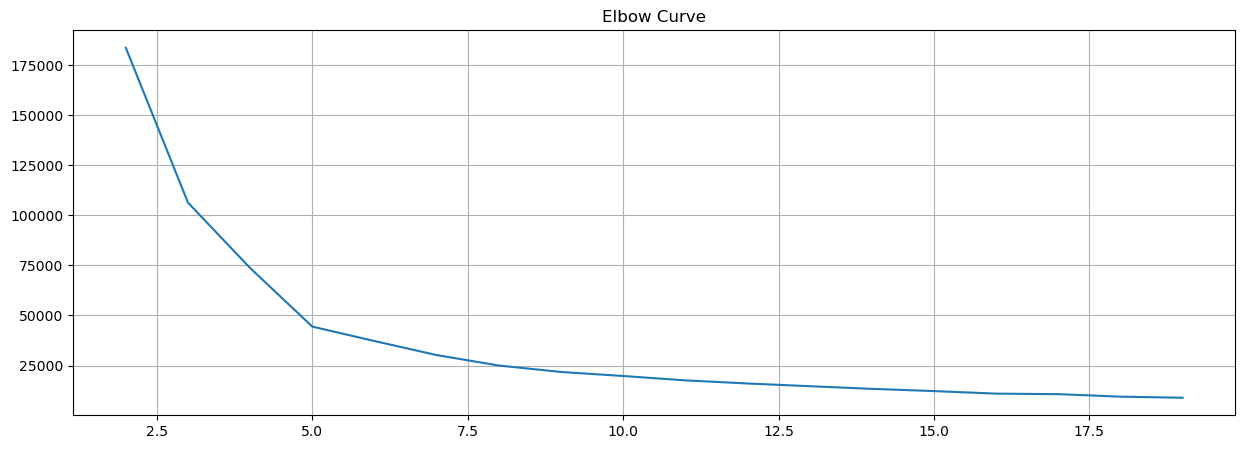

In [5]:
distortions = []
for i in range(2, 20):
    kMeans = KMeans(n_clusters=i,n_init = 10)
    kMeans.fit(X)
    distortions.append(kMeans.inertia_)
    
plt.figure(figsize=(15,5))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title("Elbow Curve")
plt.show()

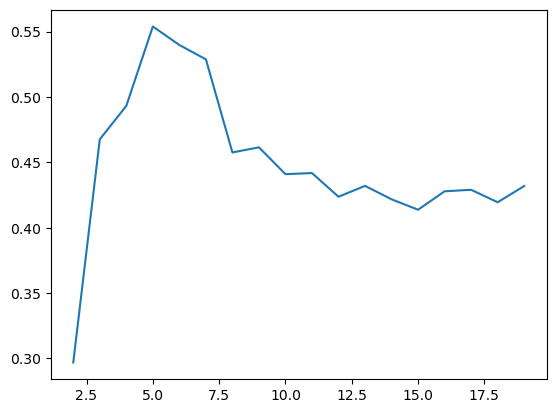

In [6]:
sih = []
for i in range(2,20):
    kMeans = KMeans(n_clusters=i, n_init=10)
    prediction = kMeans.fit_predict(X)
    score = silhouette_score(X,prediction)
    sih.append(score)
plt.plot(range(2,20),sih)
plt.show()
    

In [7]:
n_clusters = 5
kMeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=2)
kMeans.fit(X)

cluster_labels = kMeans.labels_

dataSet["Cluster"] = cluster_labels

In [8]:
dataSet

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


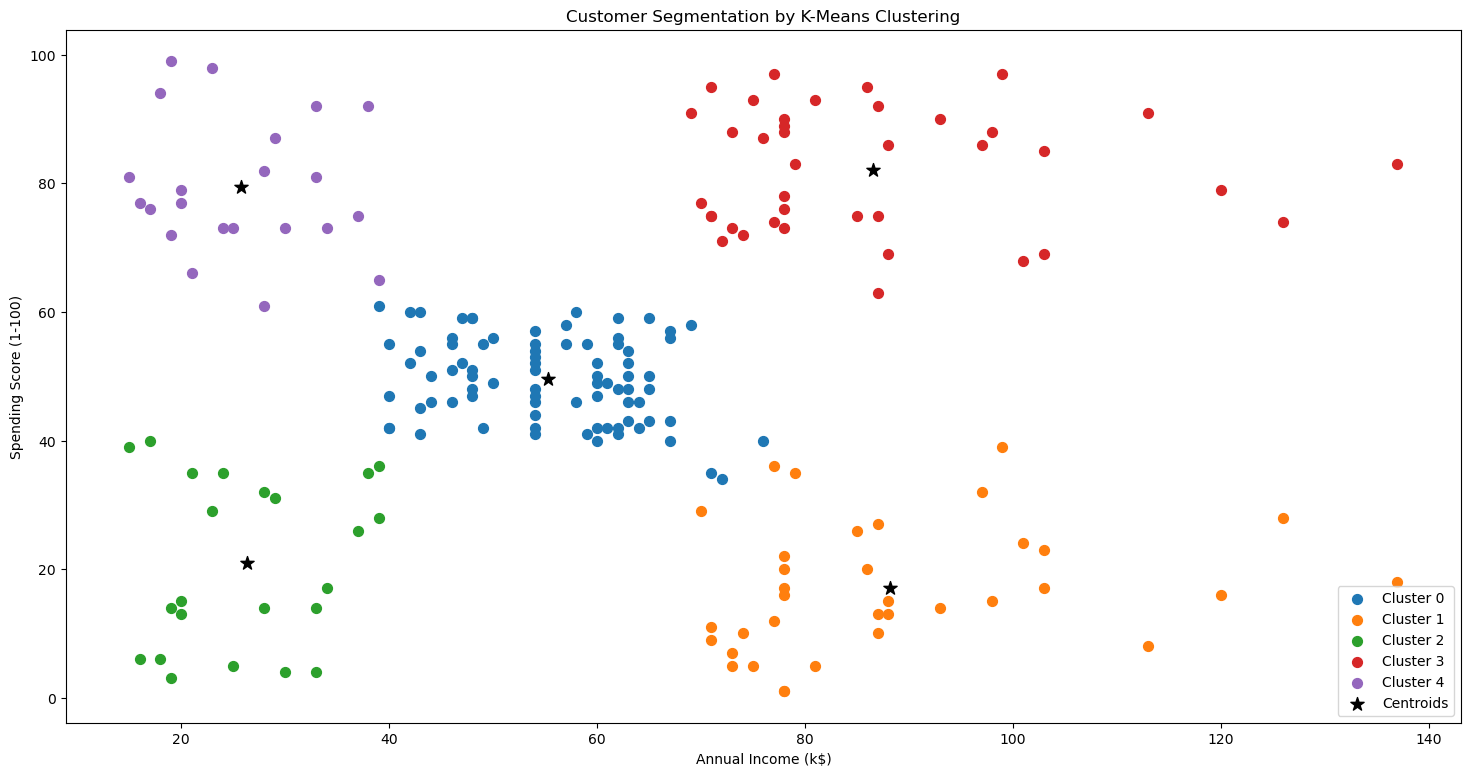

In [9]:
plt.figure(figsize=(18,9))
for cluster_label in range(n_clusters):
    cluster_data = X[cluster_labels == cluster_label]
    
    plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'],
               label = f'Cluster {cluster_label}', s =50)
    
centroids = kMeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1], c = 'k',marker = "*", label = "Centroids", s= 100)
plt.title('Customer Segmentation by K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()

plt.show()

In [10]:
n_clusters = 5
aCluster = AgglomerativeClustering(n_clusters=n_clusters)
aCluster.fit(X)

cluster_labels = aCluster.labels_

dataSet["Cluster"] = cluster_labels

In [11]:
dataSet

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


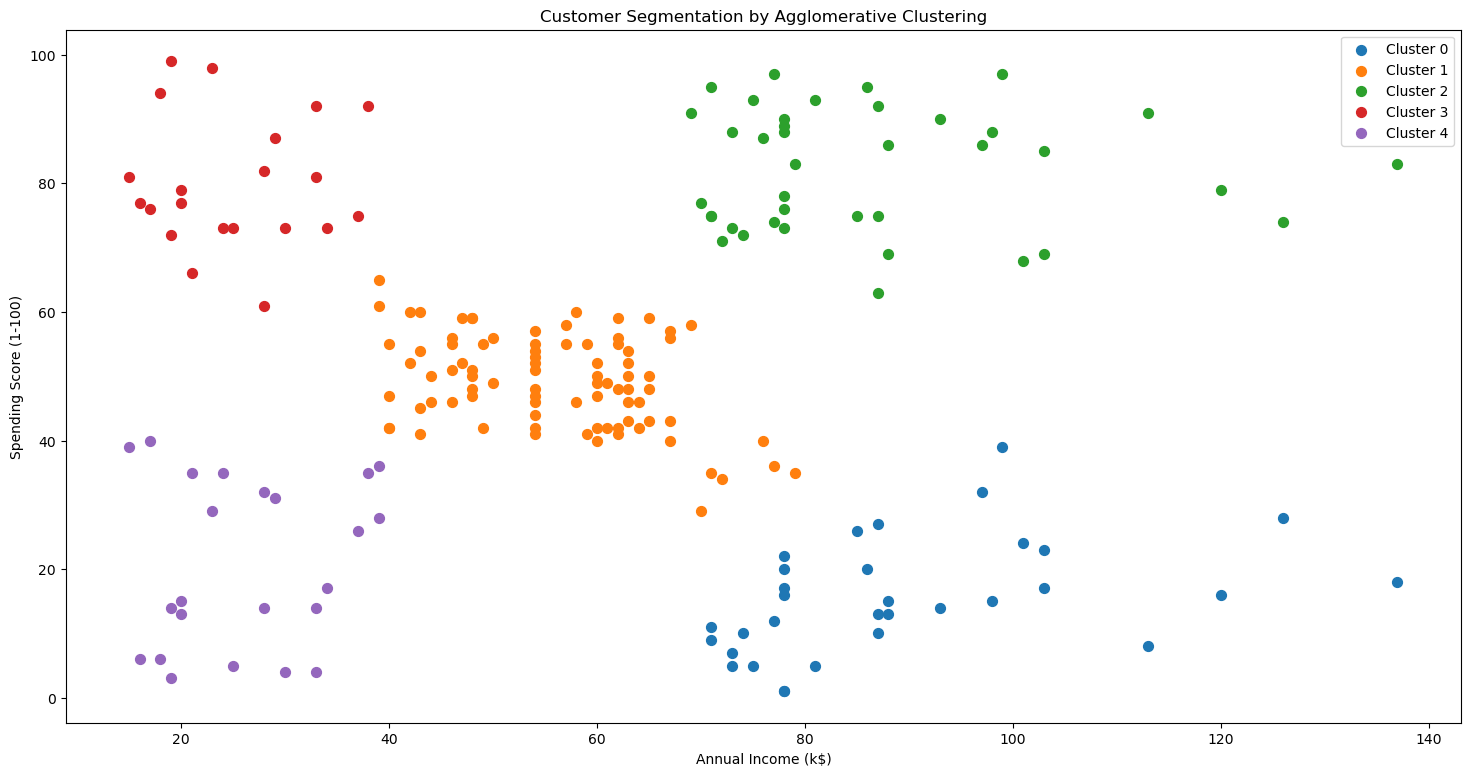

In [12]:
plt.figure(figsize=(18,9))
for cluster_label in range(n_clusters):
    cluster_data = X[cluster_labels == cluster_label]
    
    plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'],
               label = f'Cluster {cluster_label}', s =50)
 
plt.title('Customer Segmentation by Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()

plt.show()

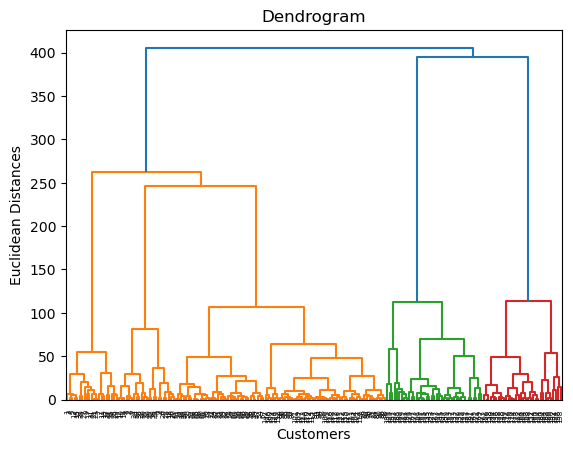

In [13]:
dendrogram(linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()